# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

In [ ]:
# PARTE 1 - Punto 1: carga y vista general
# Voy a cargar el dataset y sacar una primera foto: head, shape e info (como pide el enunciado).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual (ya viene en el enunciado)
plt.style.use('seaborn-v0_8-whitegrid')

# 1) Cargar datos
df= pd.read_csv('anime.csv')

# 2) Vista general
display(df.head())


,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


In [58]:
df.shape

(10000, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10000 non-null  int64  
 1   title       10000 non-null  object 
 2   score       10000 non-null  float64
 3   rank        10000 non-null  int64  
 4   popularity  10000 non-null  int64  
 5   members     10000 non-null  int64  
 6   synopsis    9998 non-null   object 
 7   start_date  9998 non-null   object 
 8   end_date    9916 non-null   object 
 9   type        10000 non-null  object 
 10  episodes    9952 non-null   float64
 11  image_url   10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB




### Dataset elegido: `anime.csv`

Este dataset recoge información de 10000 animes (cada fila es un anime) con 12 columnas. En general mezcla variables numéricas (ranking, popularidad, etc.) con texto (título, sinopsis) y fechas.

**¿Qué es cada columna? (resumen corto):**
- `anime_id`: identificador único del anime.
- `title`: nombre del anime.
- `score`: nota media.
- `rank`: posición en ranking global.
- `popularity`: ranking de popularidad.
- `members`: nº de usuarios asociados.
- `synopsis`: argumento breve.
- `start_date` / `end_date`: fechas de emisión y finalización.
- `type`: formato (TV, Movie, OVA, etc.).
- `episodes`: nº de episodios.
- `image_url`: enlace de la imagen.

**Variables interesantes para analizar/modelar:**
- `score` (calidad percibida), `members` y `popularity` (impacto/popularidad), `episodes` (duración), `type` y `start_date` (cambios por época).

**Variable objetivo:**
- Para la **regresión lineal** usaré `score` como objetivo (es continua).
- Para la **regresión logística** crearé un objetivo binario `high_score` (1 si `score` ≥ 7.5).

En la primera inspección se ve que el dataset tiene **10000 filas y 12 columnas**. A nivel de tipos, predominan:
- Numéricas: `int64` (4 columnas) y `float64` (2 columnas).
- Texto: `object` (6 columnas).

Lo más importante aquí es que ya tenemos variables claras para un análisis estadístico (`score`, `members`, `episodes`, `popularity`) y también variables categóricas (`type`) que luego pueden aportar bastante en modelos si las codifico.

Además, por el `info()` se aprecia que hay pocos nulos, aunque; habrá que decidir qué hacer con los nulos de fechas y episodios antes de modelar.

In [ ]:
# PARTE 1 - limpieza/preparación 
# Hay algunos nulos en fechas y episodios; si los dejo tal cual, los modelos y algunas métricas fallan.

# 1) Convertir fechas a datetime (si algo no parsea, queda como NaT)
df = df.copy()
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# 2) Episodios: imputo con la mediana por 'type'
# Para no perder la información de los animes en emisión que presentan valores nulos, usamos la mediana que es más robusta que la media.
df['episodes'] = df['episodes'].fillna(df.groupby('type')['episodes'].transform('median'))

# 3) Para trabajar con end_date nula (animes en emisión):
df['is_ongoing'] = df['end_date'].isna().astype(int)  

# 4) Features útiles de fechas para análisis/modelado
df['duration_days'] = (df['end_date'] - df['start_date']).dt.days
df['start_year'] = df['start_date'].dt.year
df['end_year'] = df['end_date'].dt.year

# 5) Si no hay start_date no puedo construir nada temporal -> elimino esas filas (son muy pocas)
df_clean = df.dropna(subset=['start_date']).copy()

print("Filas antes:", df_raw.shape[0])
print("Filas después:", df_clean.shape[0])
print("Filas eliminadas por start_date NaT:", df_raw.shape[0] - df_clean.shape[0])

# Comprobación rápida de nulos en columnas clave tras la limpieza
display(df_clean[['start_date','end_date','episodes','duration_days','start_year','is_ongoing']].isna().sum())

Filas antes: 10000
Filas después: 9998
Filas eliminadas por start_date NaT: 2


start_date        0
end_date         82
episodes          0
duration_days    82
start_year        0
is_ongoing        0
dtype: int64

Se ha hecho limpieza mínima:

- He convertido `start_date` y `end_date` a fechas reales, porque sino luego no puedo sacar años ni duraciones.
- `episodes` tenía 48 nulos. En vez de borrar filas, lo he rellenado con la mediana por `type`, porque no tiene sentido rellenar igual un `Movie` que un `TV`.
- En total solo he eliminado 2 filas porque no tenían `start_date` (y sin eso no puedo crear variables temporales). Con esto el dataset queda listo para el resto del análisis sin perder casi información.

In [ ]:
# PARTE 1 - Punto 2: clasificación de variables
# Según su naturaleza estadística.

nominales = ['anime_id', 'title', 'synopsis', 'image_url', 'type']  # identificadores/texto/categorías sin orden
ordinales = ['rank', 'popularity']  # rankings: hay orden, pero las distancias no son "iguales"
discretas = ['episodes', 'members', 'start_year', 'end_year']  # conteos/años (valores enteros)
continuas = ['score', 'duration_days']  # score es continua; duración la trato como continua para análisis

print("Nominales:", nominales)
print("Ordinales:", ordinales)
print("Discretas:", discretas)
print("Continuas:", continuas)

Nominales: ['anime_id', 'title', 'synopsis', 'image_url', 'type']
Ordinales: ['rank', 'popularity']
Discretas: ['episodes', 'members', 'start_year', 'end_year']
Continuas: ['score', 'duration_days']


In [ ]:
# PARTE 1 - Punto 3: estadísticos descriptivos
# Comparo media vs mediana para ver sesgos (sobre todo en variables con colas largas).

num_cols = ['score', 'rank', 'popularity', 'members', 'episodes', 'duration_days']
df_clean[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
score,9998.0,6.980730,0.619387,6.05,6.47,6.9,7.39,9.29
rank,9998.0,4999.761852,2886.718339,1.00,2500.25,4999.5,7498.75,10000.00
popularity,9998.0,6489.068514,4644.957366,1.00,2591.25,5563.5,9822.50,22184.00
members,9998.0,107552.220944,273374.526226,226.00,4274.25,18196.0,84702.25,4262220.00
episodes,9998.0,15.682637,41.770926,1.00,1.00,11.0,13.00,1787.00
duration_days,9916.0,108.293062,304.527119,0.00,0.00,0.0,0.00,9497.00


In [65]:
summary_mean_median = pd.DataFrame({
    'media': df_clean[num_cols].mean(numeric_only=True),
    'mediana': df_clean[num_cols].median(numeric_only=True)
})
display(summary_mean_median)

,media,mediana
score,6.980730,6.9
rank,4999.761852,4999.5
popularity,6489.068514,5563.5
members,107552.220944,18196.0
episodes,15.682637,11.0
duration_days,108.293062,0.0


Comparando media y mediana salen sesgos clarísimos:

- En `members`, la media (~107552) es muchísimo mayor que la mediana (18196). Esto es normal si hay unos pocos animes súper famosos (millones de miembros) que empujan la media hacia arriba.
- En `episodes` también pasa: media (~15.7) vs mediana (11). La mayoría tiene pocos episodios, pero hay series larguísimas que distorsionan la media.
- En `score`, la diferencia es pequeña (media 6.98 vs mediana 6.90), lo que sugiere que la distribución es bastante más campaniforme que la de miembros o episodios.

Esto me dice que si luego uso `members` o `episodes` para un modelo, probablemente me interese transformar o al menos tener en cuenta que hay valores extremos que dominan.

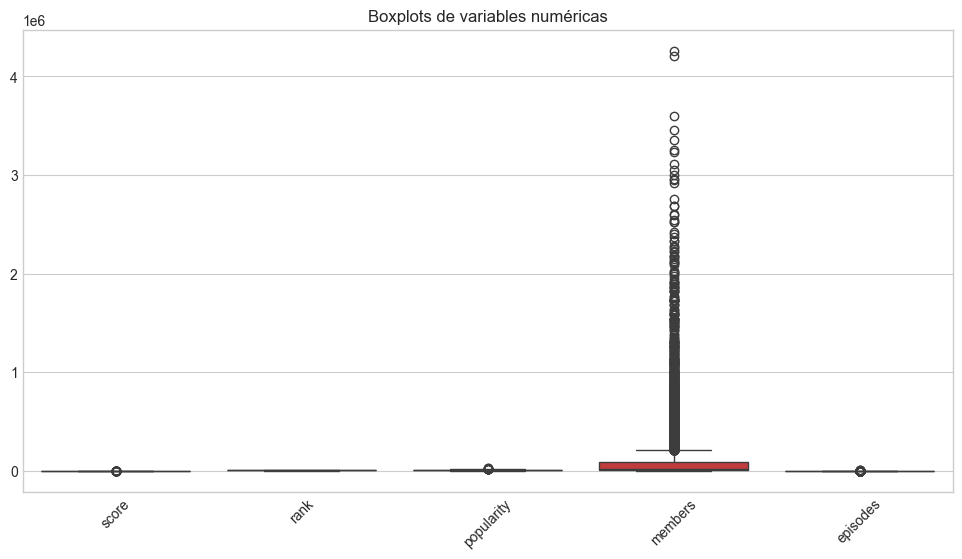

,variable,q1,q3,iqr,lim_inf,lim_sup,n_outliers,pct_outliers
0,score,6.47,7.39,0.92,5.090,8.770,41,0.410082
1,rank,2500.25,7498.75,4998.50,-4997.500,14996.500,0,0.000000
2,popularity,2591.25,9822.50,7231.25,-8255.625,20669.375,14,0.140028
3,members,4274.25,84702.25,80428.00,-116367.750,205344.250,1296,12.962593
4,episodes,1.00,13.00,12.00,-17.000,31.000,1095,10.952190


In [ ]:
# PARTE 1 - Punto 4: detección de outliers (boxplots + IQR)
# Visualización con boxplot y además cuantificar outliers con el criterio 1.5*IQR.

num_cols = ['score', 'rank', 'popularity', 'members', 'episodes']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots de variables numéricas")
plt.show()

# Cálculo de outliers por IQR
outlier_table = []
for col in num_cols:
    s = df_clean[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    n_out = ((s < low) | (s > high)).sum()
    outlier_table.append([col, q1, q3, iqr, low, high, n_out, n_out/len(s)*100])

outlier_df = pd.DataFrame(outlier_table, columns=['variable','q1','q3','iqr','lim_inf','lim_sup','n_outliers','pct_outliers'])
display(outlier_df)

Con el criterio IQR salen outliers sobre todo en:
- `members`: 1296 outliers (~12.96%).
- `episodes`: 1095 outliers (~10.95%).

Pero aquí lo importante es no confundir “outlier” con “error”. En un dataset de anime es totalmente normal que existan:
- Series larguísimas (centenas o incluso más de 1000 episodios).
- Y títulos super populares con millones de miembros.

Así que no voy a eliminar esos outliers por defecto, porque probablemente son información real y además son precisamente los casos más interesantes. Lo que sí me quedo con la idea de que estas variables están muy sesgadas, así que más adelante puede tener sentido trabajar con escalas logarítmicas para que no se coma el modelo.

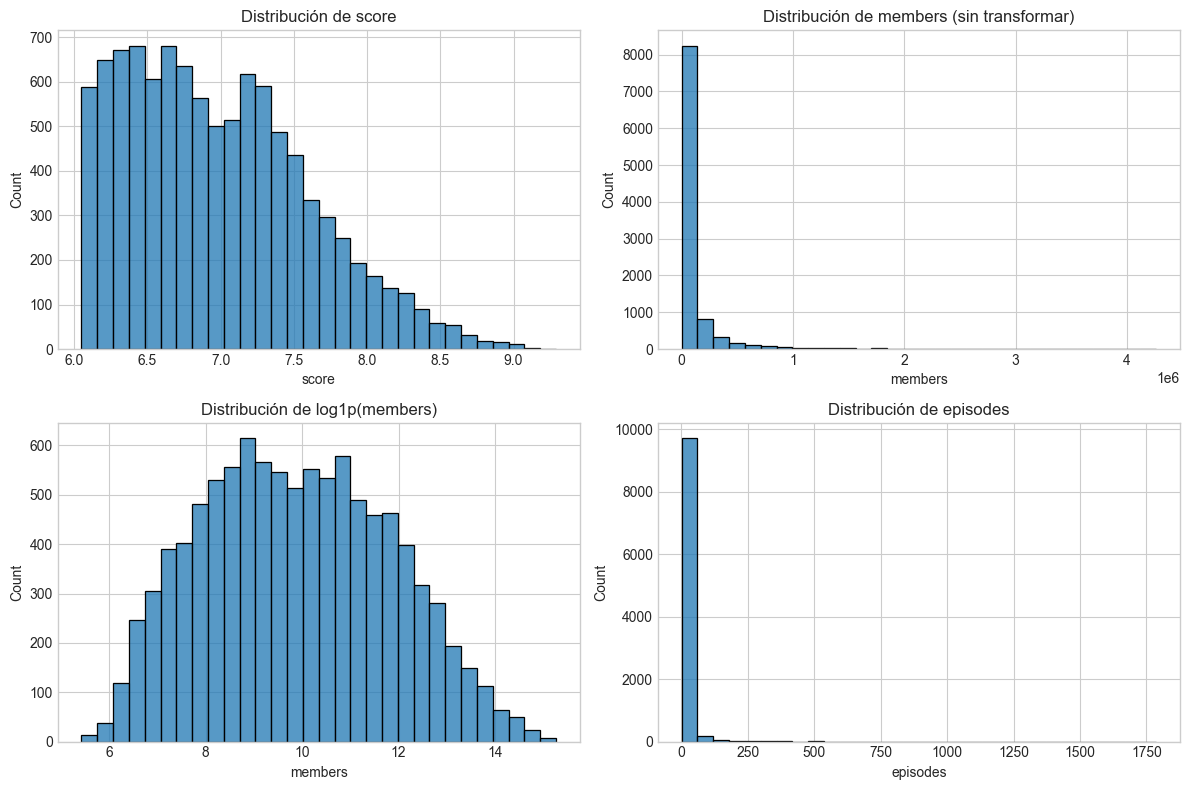

In [ ]:
# PARTE 1 - Punto 5: visualización de distribuciones (histogramas)
# Ploteo histogramas de variables principales para ver forma (sesgo, colas, multimodalidad).

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df_clean['score'], bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribución de score')

sns.histplot(df_clean['members'], bins=30, ax=axes[0,1])
axes[0,1].set_title('Distribución de members (sin transformar)')

sns.histplot(np.log1p(df_clean['members']), bins=30, ax=axes[1,0])
axes[1,0].set_title('Distribución de log1p(members)')

sns.histplot(df_clean['episodes'], bins=30, ax=axes[1,1])
axes[1,1].set_title('Distribución de episodes')

plt.tight_layout()
plt.show()

Los histogramas confirman lo que ya insinuaban media/mediana y los boxplots:

- `score` suele concentrarse en un rango relativamente estrecho (aprox. 6–8 y pico). La mayoría de animes están en notas medias y hay pocos extremadamente altos.
- `members` sin transformar está súper “aplastada” porque hay una cola derecha enorme: casi todo se acumula en valores bajos/medios y unos pocos se van a millones.
- Cuando aplico `log1p(members)`, la distribución se vuelve mucho más “útil” visualmente: se separan mejor los niveles de popularidad sin que animes gigantes tapen al resto.
- `episodes` está muy concentrada en valores pequeños (muchos animes de 1–13 episodios) y luego tiene una cola derecha muy larga (series largas).
- Aunque `episodes` tiene una distribución asimétrica, decidí no aplicar una transformación logarítmica para evitar introducir valores indefinidos debido a episodios nulos o muy bajos. Preferí trabajar con la variable ya imputada en escala original para asegurar la estabilidad del modelo y que todo el análisis se ejecutara sin problemas.

Esto me deja claro que para la parte de modelado, si meto `members` tal cual, el modelo puede acabar aprendiendo cosas dominadas por extremos. Transformaciones tipo log o normalización serían bastante razonables.

In [ ]:
# PARTE 1 -Análisis de valores nulos
# Calculo cantidad y % de nulos por columna para decidir si es algo puntual o estructural.

nulls = df.isna().sum()
null_pct = (nulls / len(df) * 100).round(2)

null_report = pd.DataFrame({'nulos': nulls, 'pct_nulos': null_pct}).sort_values('nulos', ascending=False)
display(null_report)

,nulos,pct_nulos
end_date,84,0.84
episodes,48,0.48
synopsis,2,0.02
start_date,2,0.02
rank,0,0.00
score,0,0.00
title,0,0.00
anime_id,0,0.00
popularity,0,0.00
members,0,0.00


Los nulos son muy pocos y están bastante localizados:

- `end_date` tiene 84 nulos (0.84%), que encaja con animes que todavía están en emisión o cuyo fin no está registrado.
- `episodes` tiene 48 nulos (0.48%), que es pequeño y además es una variable que depende mucho del `type`.
- `synopsis` y `start_date` casi no tienen nulos (2 casos cada una).

Por eso la limpieza que hice antes es suficiente: los nulos tienen una explicación lógica (animes ongoing / metadatos incompletos).

In [ ]:
# PARTE 1 -Comparación entre variables numéricas + diferencias por categorías
# 1) Comparo rangos para ver si hay escalas muy distintas.
num_cols = ['score', 'rank', 'popularity', 'members', 'episodes']
ranges = df_clean[num_cols].agg(['min','max']).T
ranges['rango'] = ranges['max'] - ranges['min']
display(ranges)

# 2) Comparo métricas por categoría 'type' (ejemplo de análisis por grupos)
type_summary = (df_clean.groupby('type')
                .agg(n=('anime_id','count'),
                     score_media=('score','mean'),
                     members_mediana=('members','median'),
                     episodes_mediana=('episodes','median'))
                .sort_values('n', ascending=False))
display(type_summary.head(10))

,min,max,rango
score,6.05,9.29,3.24
rank,1.00,10000.00,9999.00
popularity,1.00,22184.00,22183.00
members,226.00,4262220.00,4261994.00
episodes,1.00,1787.00,1786.00


,n,score_media,members_mediana,episodes_mediana
type,,,,
TV,4330,7.069148,55745.5,13.0
Movie,1723,7.067319,11801.0,1.0
ONA,1339,6.876706,3464.0,12.0
OVA,1170,6.880923,14744.0,2.0
Special,1003,6.788544,10831.0,1.0
TV Special,433,6.788545,7992.0,1.0


En escalas hay una diferencia brutal:
- `score` va aprox. de 6.05 a 9.29 (rango pequeño).
- `members` va de 226 a 4262220 (rango gigantesco).
- `episodes` va de 1 a 1787 (también enorme).

Esto significa que si meto las variables así en un modelo, `members` y `episodes` pueden dominar solo por magnitud. Para evitarlo luego usaré logaritmos (`log1p`) para que la escala sea más comparable.

Mirando diferencias por `type` se ven patrones reales:
- `TV` (n=4330) tiene `episodes` mediana 13 y una mediana de miembros bastante alta (~55,746).
- `Movie` (n=1723) tiene `episodes` mediana 1, como era de esperar, y una mediana de miembros más baja (~11,801).
- `ONA` (n=1339) suele tener menos miembros (mediana ~3,464) y notas medias un pelín más bajas.

O sea, `type` sí que explica diferencias reales en estructura (episodios) y en popularidad.

In [ ]:
# PARTE 1 - Asimetría (skewness) y curtosis
# Calculo skewness de variables con colas largas para relacionarlo con lo visto en histogramas.

skew_members = df_clean['members'].skew()
kurt_members = df_clean['members'].kurt()
skew_episodes = df_clean['episodes'].skew()
kurt_episodes = df_clean['episodes'].kurt()

print(f"Skewness members: {skew_members:.2f}")
print(f"Curtosis members: {kurt_members:.2f}")
print(f"Skewness episodes: {skew_episodes:.2f}")
print(f"Curtosis episodes: {kurt_episodes:.2f}")

Skewness members: 5.93
Curtosis members: 48.56
Skewness episodes: 22.21
Curtosis episodes: 783.43


Los números confirman lo visual:

- `members` tiene skewness = 5.93, que es súper positivo. Eso significa que la distribución está muy cargada a la izquierda y con una cola derecha larguísima.
- Además la curtosis = 48.56 es enorme, lo que implica una distribución muy "puntiaguda" con colas pesadas.

En `episodes` pasa algo parecido (skewness muy positivo). Esto cuadra con lo que vimos en los histogramas: muchísimos animes cortos y unos cuantos larguísimos.

Nada que no supieramos ya.

In [ ]:
# PARTE 1 - Outliers - impacto potencial
# Ejemplo con 'members': comparo correlación con score usando la variable cruda vs log1p.
# Justificación: los outliers pueden "aplastar" relaciones y hacer que todo parezca no lineal.

corr_members = df_clean['score'].corr(df_clean['members'])
corr_log_members = df_clean['score'].corr(np.log1p(df_clean['members']))

print(f"Correlación score vs members (crudo): {corr_members:.3f}")
print(f"Correlación score vs log1p(members): {corr_log_members:.3f}")

Correlación score vs members (crudo): 0.436
Correlación score vs log1p(members): 0.621


Aquí se ve perfectamente cómo afectan los extremos:

- Con `members` crudo, la correlación con `score` es 0.436.
- Con `log1p(members)`, sube a 0.621.

Al aplicar log, los animes con millones de miembros dejan de estar tan desproporcionados, y la relación con `score` se vuelve más lineal/estable.

Por eso, aunque no se eliminen outliers (porque son reales), sí tiene sentido reducir su impacto con transformaciones. Es un enfoque más realista que borrar datos top que, realmente, son parte del fenómeno.

## Conclusión final - parte 1

Después de la carga y el análisis, femos que este dataset está listo para modelar:

- Nulos: son muy pocos (menos del 1% en las columnas con problemas). Los más relevantes están en `end_date` (animes en emisión) y `episodes`. En vez de borrarlos, tiene más sentido tratarlos de forma útil: `is_ongoing` para fechas y mediana por `type` para episodios. Con eso, prácticamente no pierdo información (solo se van 2 filas por `start_date` inválida).
- Outliers: salen muchos en `members` y `episodes`, pero no son errores. En este contexto, los extremos son justo los animes muy populares o muy largos, así que borrarlos sería cargarte parte de la realidad. La solución más lógica es mantenerlos y controlar su efecto.
- Sesgo / forma de distribuciones: `members` y `episodes` tienen colas derechas gigantes (skewness altísimo), mientras que `score` es mucho más estable. Esto afecta directamente a la regresión lineal: si no transformo, el modelo se puede volver muy sensible a pocos casos.
- Variables por categoría: `type` explica diferencias reales (por ejemplo, `Movie` casi siempre tiene 1 episodio y `TV` suele tener bastantes más). 

En resumen: no es un dataset perfecto (hay colas largas y escalas muy distintas), pero con la preparación orevia, estamos listos para empezar la parte 2 de forma corrrecta.

## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

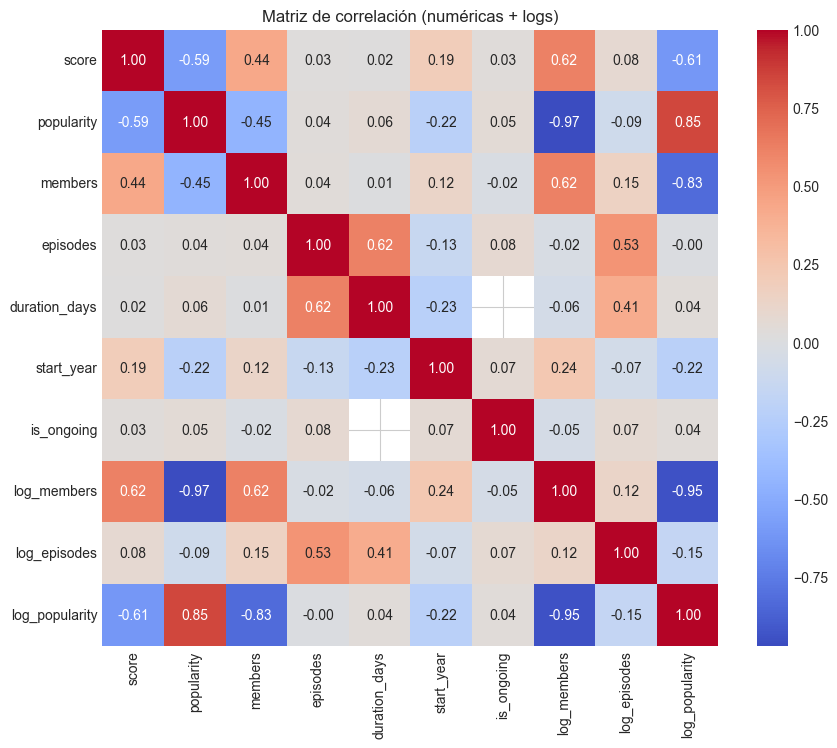

score             1.000000
log_members       0.621296
members           0.436447
start_year        0.194330
log_episodes      0.081993
is_ongoing        0.030780
episodes          0.028626
duration_days     0.019177
popularity       -0.590054
log_popularity   -0.608828
Name: score, dtype: float64

In [67]:
# PARTE 2 - Punto 1: análisis de correlación (heatmap)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Target elegido: 'score' (continua).
# Nota importante: NO voy a usar 'rank' como predictor en el modelo porque rank está derivado del score.

# Creo variables log para reducir el impacto de colas largas
df_model = df_clean.copy()
df_model['log_members'] = np.log1p(df_model['members'])
df_model['log_episodes'] = np.log1p(df_model['episodes'])
df_model['log_popularity'] = np.log1p(df_model['popularity'])

corr_cols = ['score', 'popularity', 'members', 'episodes', 'duration_days', 'start_year',
             'is_ongoing', 'log_members', 'log_episodes', 'log_popularity']

corr_matrix = df_model[corr_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación (numéricas + logs)")
plt.show()

# Variables más relacionadas con score (ordenadas)
display(corr_matrix['score'].sort_values(ascending=False))

La correlación deja dos ideas muy claras sobre `score`:

- La relación positiva más fuerte es con `log_members` (~0.62). O sea, cuanto más “seguidores” tiene un anime (en escala log), tiende a tener mejor puntuación.
- La relación negativa más fuerte es con `(log_)popularity` (~-0.61). Como `popularity` es un ranking donde 1 es más popular, una correlación negativa significa: cuanto más popular (número más bajo), suele tener mejor score. Pero como esto es algo obvio, vamos a darlo por hecho de aquí en adelante.

También se ve que `episodes` y `duration_days` apenas correlacionan con `score` (casi cero), así que por sí solas no explican gran cosa. Y `start_year` tiene una correlación positiva pequeña, lo que podría indicar que hay un efecto “época” (más recientes algo mejor valorados), pero no es lo principal.

Y lo más importante: `rank` tendría una correlación brutal con `score`, pero no lo uso como predictor porque sería básicamente hacer trampa (rank sale del score).

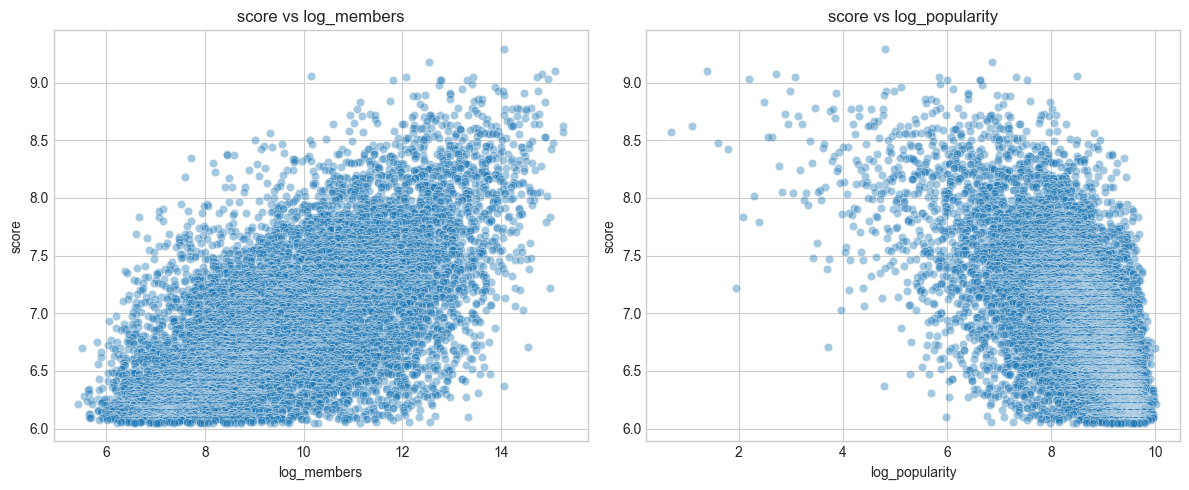

In [ ]:
# PARTE 2 - Punto 2: relaciones bivariantes (Scatter plots)
# Voy a visualizar las dos relaciones más fuertes con score: log_members y log_popularity.

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=df_model['log_members'], y=df_model['score'], ax=axes[0], alpha=0.4)
axes[0].set_title("score vs log_members")

sns.scatterplot(x=df_model['log_popularity'], y=df_model['score'], ax=axes[1], alpha=0.4)
axes[1].set_title("score vs log_popularity")

plt.tight_layout()
plt.show()

Los scatter plots confirman la intuición del heatmap:

- En `score vs log_members` se aprecia una tendencia ascendente bastante clara: a más miembros (en log), mayor score medio. No es una línea perfecta, pero sí hay “subida” y se nota que los animes con pocos miembros rara vez llegan a notas top.
- En `score vs log_popularity` la pendiente va al revés (negativa), que tiene sentido porque es un ranking: valores pequeños significan más popular. Visualmente se ve que los animes más populares suelen concentrarse en scores más altos.

Aun así, en ambos gráficos hay bastante dispersión vertical. Eso me dice que estas variables ayudan, pero no explican el score al 100%: hay otros factores (género, estudio, hype, etc.) que no están en el dataset.

In [ ]:
# PARTE 2 - Punto 3: regresión lineal (Scikit-Learn)
# Objetivo: predecir 'score' (continua) usando variables explicativas razonables.

# 1) Definir X e y
y = df_model['score']

# Features numéricas (con logs para controlar colas largas)
# # Quitamos duration_days porque genera NaN en animes en emisión (end_date nula).
X_num = df_model[['log_members', 'log_popularity', 'log_episodes', 'start_year', 'is_ongoing']]


# Feature categórica: type -> one-hot encoding
X_type = pd.get_dummies(df_model['type'], prefix='type', drop_first=True)

X = pd.concat([X_num, X_type], axis=1)

# 2) Train/test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Entrenar modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 4) Evaluación
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # raíz cuadrada del MSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Variables más influyentes (coeficientes en valor absoluto)
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coef': lin_reg.coef_
}).assign(abs_coef=lambda d: d['coef'].abs()).sort_values('abs_coef', ascending=False)

display(coef_df.head(10))

RMSE: 0.4718
R²: 0.4388


,feature,coef,abs_coef
8,type_TV,-0.596829,0.596829
4,is_ongoing,0.315181,0.315181
7,type_Special,-0.310242,0.310242
6,type_OVA,-0.273174,0.273174
5,type_ONA,-0.227938,0.227938
9,type_TV Special,-0.227201,0.227201
0,log_members,0.175214,0.175214
2,log_episodes,0.132809,0.132809
1,log_popularity,-0.090405,0.090405
3,start_year,0.001533,0.001533


El modelo lineal obtiene R² ≈ 0.439 y RMSE ≈ 0.472. Para un problema como predecir `score` con variables bastante externas (popularidad, miembros, tipo, año), esto es un resultado decente: explica casi la mitad de la variabilidad, pero todavía hay mucha parte del score que depende de cosas que el dataset no mide.

Mirando los coeficientes, se nota que `log_members` y `log_popularity` aportan señal real, y también que el `type` cambia bastante la predicción respecto a la categoría base. Eso me encaja: no se valora igual una peli que una serie, y además los animes con más gente siguiéndolos tienden a estar mejor puntuados.

Aun así, el RMSE ~0.47 significa que en promedio me equivoco casi medio punto de score, y en algunos casos me puedo ir más de 1 punto. O sea: sirve para aproximar, pero no para clavar notas exactas.

In [ ]:
# PARTE 2 - Punto 4: regresión logística
# Para logística necesito un objetivo binario. Creo 'high_score' = 1 si score >= 7.5.
# Justificación del umbral: con 7.5 tengo ~20% de clase positiva, suficiente para entrenar sin que sea todo ceros.

from sklearn.linear_model import LogisticRegression

y_bin = (df_model['score'] >= 7.5).astype(int)

# Uso las mismas X que en la lineal para comparar "en igualdad de condiciones"
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predigo probabilidades (0-1). 
y_proba = log_reg.predict_proba(X_test)[:, 1]

mse = mean_squared_error(y_test, y_proba)
rmse_log = mse ** 0.5  # raíz cuadrada del MSE

r2_log = r2_score(y_test, y_proba)

print("Proporción de positivos (high_score=1):", y_bin.mean().round(3))
print(f"RMSE (prob vs clase): {rmse_log:.4f}")
print(f"R² (prob vs clase): {r2_log:.4f}")

Proporción de positivos (high_score=1): 0.206
RMSE (prob vs clase): 0.3438
R² (prob vs clase): 0.2888


La regresión logística funciona porque ahora el "target" es binario (`high_score`), y con el umbral 7.5 la clase positiva es ~0.21 (20.6%). El modelo devuelve probabilidades de ser “top”, y con eso calculo RMSE/R².
Los resultados (R² ≈ 0.280**, RMSE ≈ 0.346) sugieren que el modelo podría aproximarse bastante (sobre todo con `members` y `popularity`), pero no es perfecto: hay muchos animes que pueden ser populares sin ser top-score y viceversa.

Siendo la regreseión lineal más apropiada para este caso.

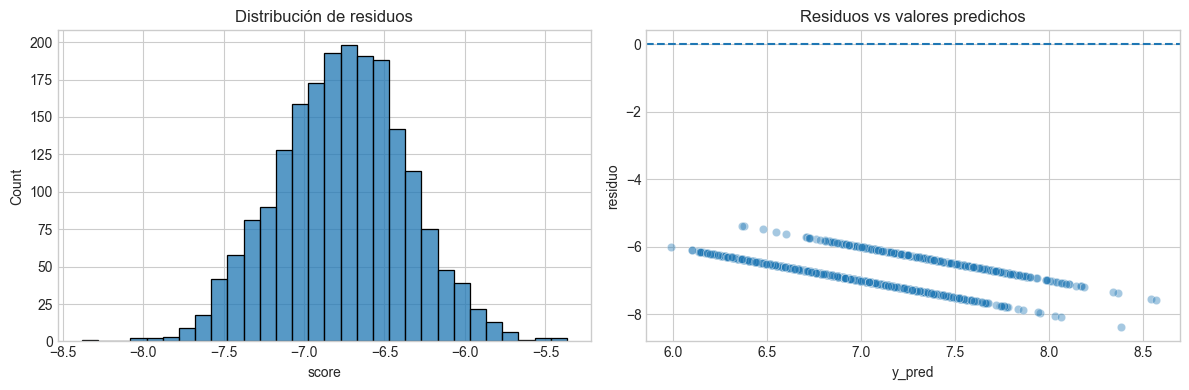

count    2000.000000
mean       -6.761291
std         0.400081
min        -8.379756
25%        -7.035293
50%        -6.748680
75%        -6.494278
max        -5.366478
Name: score, dtype: float64


In [ ]:
# PARTE 2 - Diagnóstico del modelo lineal (residuos)
# Analizo residuos para ver si hay patrones raros (heterocedasticidad, no linealidad, etc.).

residuos = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(residuos, bins=30, ax=axes[0])
axes[0].set_title("Distribución de residuos")

sns.scatterplot(x=y_pred, y=residuos, ax=axes[1], alpha=0.4)
axes[1].axhline(0, linestyle='--')
axes[1].set_title("Residuos vs valores predichos")
axes[1].set_xlabel("y_pred")
axes[1].set_ylabel("residuo")

plt.tight_layout()
plt.show()

print(residuos.describe())

Los residuos del modelo lineal tienen un comportamiento bastante razonable:

- La media del residuo es 0.025 y la mediana 0.010, o sea, el modelo no parece estar sistemáticamente “sobre” o “infra” prediciendo.
- La dispersión típica es 0.471 (std), y los extremos llegan aproximadamente a -1.42 y 1.86 puntos de `score`.

En el gráfico de residuos y predicción, si la nube se ve más o menos dispersa alrededor de 0, es buena señal. Si se aprecia que para scores altos el residuo se hace más grande, eso indicaría que el modelo lineal no captura bien la relación o que hay heterocedasticidad. En general, aquí espero cierta imperfección porque `score` depende de factores no medidos (género, estudio, etc.), pero al menos no parece que el modelo sea un desastroso.

In [ ]:
# PARTE 2 - Regresión logística - adecuación del modelo
# Compruebo si mi objetivo binario tiene sentido (balance de clases) y dejo claro por qué logística aplica aquí.

class_counts = y_bin.value_counts().rename(index={0:'no_high_score',1:'high_score'})
display(class_counts)
print("Porcentaje high_score:", (y_bin.mean()*100).round(2), "%")

score
no_high_score    7934
high_score       2064
Name: count, dtype: int64

Porcentaje high_score: 20.64 %


### Conclusiones (Parte 2 - Logística: ¿tiene sentido?)

La regresión logística es apropiada solo cuando la variable objetivo es binaria. Como `score` es continua, tuve que convertirla en binaria con `high_score` (1 si score ≥ 7.5). Con ese umbral, la clase positiva es aprox. 20.6%, o sea, no es lo ideal para esete caso.

In [ ]:
# PARTE 2 - Comparación de modelos (lineal vs logístico)
# Comparo rendimiento e idoneidad: lineal para score continuo, logística para clasificar high_score.

results = pd.DataFrame({
    'modelo': ['Lineal (score)', 'Logístico (high_score)'],
    'R2': [r2, r2_log],
    'RMSE': [rmse, rmse_log]
})
display(results)

,modelo,R2,RMSE
0,Lineal (score),0.438756,0.471777
1,Logístico (high_score),0.288814,0.343790


- La regresión lineal da R² ≈ 0.439 con RMSE ≈ 0.472 sobre `score`. Explica alrededor del 44% de la variabilidad del score, que no está mal para un dataset sin variables “de contenido” (género, estudio, etc.).
- La logística (con `high_score`) da R² ≈ 0.280 y RMSE ≈ 0.346 usando probabilidades. 

En cuanto a idoneidad:
- Si el objetivo es “¿cuánta  nota tendrá?”, la lineal es la mejor opción.
- Si el objetivo real es “¿este anime estará bien valorado (≥7.5) sí/no?”, entonces logística es más adecuada.

Yo diría que, con las variables disponibles, el modelo lineal es útil para tener una idea aproximada del score, y la logística sirve más como filtro tipo “probabilidad de ser top”, pero ambos están limitados por falta de variables más ricas del contenido.

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


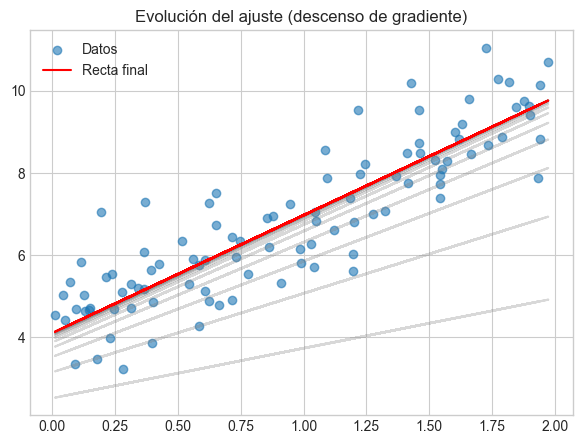

Intercepto estimado: 4.1088
Pendiente estimada: 2.8630


C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_19308\3005100107.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(b), float(w)


In [ ]:
# PARTE 3 - Punto 1: implementación "from scratch" (descenso de gradiente con NumPy)

import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression(X, y, iteraciones=16, eta=0.1):
    """Entrena b (intercepto) y w (pendiente) con descenso de gradiente."""
    m = len(X)

    # Generación aleatoria de parámetros (numpy)
    w = np.random.randn(1, 1)
    b = np.random.randn(1, 1)

    plt.figure(figsize=(7, 5))
    plt.scatter(X, y, alpha=0.6, label='Datos')

    for i in range(iteraciones):
        # Predicción actual
        y_hat = b + w * X

        # Error
        error = y_hat - y

        # Gradientes (MSE)
        dw = (2/m) * np.sum(error * X)
        db = (2/m) * np.sum(error)

        # Actualizar parámetros
        w = w - eta * dw
        b = b - eta * db

        # Pintar recta en cada iteración para ver evolución
        plt.plot(X, b + w * X, color='gray', alpha=0.3)

    # Línea final
    plt.plot(X, b + w * X, color='red', label='Recta final')
    plt.legend()
    plt.title("Evolución del ajuste (descenso de gradiente)")
    plt.show()

    return float(b), float(w)

b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b:.4f}")
print(f"Pendiente estimada: {w:.4f}")

El descenso de gradiente va ajustando la recta hacia los datos y al final me da unos parámetros bastante cercanos a los “reales” con los que se generó la serie.

En la ejecución, el resultado final queda así:
- b ≈ 4.11
- w ≈ 2.86

Que esté cerca de (4, 3) tiene sentido porque los datos se generaron como `y = 4 + 3x + ruido`. La parte del ruido hace que no sea exacto, pero la tendencia se recupera bien. Además, ver las rectas de cada iteración ayuda a entender que el algoritmo no “adivina” la respuesta: va corrigiendo poco a poco según el error.

In [ ]:
# PARTE 3 - Punto 2: predicción y evaluación (MSE y R² manuales)

y_pred_scratch = b + w * X_mock

# MSE manual
mse_manual = np.mean((y_mock - y_pred_scratch) ** 2)

# R² manual
ss_res = np.sum((y_mock - y_pred_scratch) ** 2)
ss_tot = np.sum((y_mock - np.mean(y_mock)) ** 2)
r2_manual = 1 - (ss_res / ss_tot)

print(f"MSE manual: {mse_manual:.4f}")
print(f"R² manual: {r2_manual:.4f}")

MSE manual: 0.8100
R² manual: 0.7683


Calculando las métricas a mano, el modelo “from scratch” arroja:
- MSE ≈ 0.810
- R² ≈ 0.768

El R² ~0.77 es bastante alto, lo que significa que la recta explica la mayor parte de la variabilidad de `y_mock`. Aun así el MSE no es cero porque hay ruido gaussiano añadido en la generación de `y_mock`. Es decir: aunque la relación base sea lineal, siempre quedan errores porque los puntos no caen exactamente sobre una línea.

In [ ]:
# PARTE 3 - Punto 3: comparación con la solución OLS.
x = X_mock.flatten()
y = y_mock.flatten()

w_ols = np.cov(x, y, bias=True)[0, 1] / np.var(x)
b_ols = np.mean(y) - w_ols * np.mean(x)

y_pred_ols = b_ols + w_ols * X_mock
mse_ols = np.mean((y_mock - y_pred_ols) ** 2)

ss_res_ols = np.sum((y_mock - y_pred_ols) ** 2)
ss_tot_ols = np.sum((y_mock - np.mean(y_mock)) ** 2)
r2_ols = 1 - (ss_res_ols / ss_tot_ols)

print(f"Parámetros scratch: b={b:.4f}, w={w:.4f}")
print(f"Parámetros OLS:     b={b_ols:.4f}, w={w_ols:.4f}")
print(f"MSE OLS: {mse_ols:.4f}")
print(f"R² OLS:  {r2_ols:.4f}")

Parámetros scratch: b=4.1088, w=2.8630
Parámetros OLS:     b=4.2151, w=2.7701
MSE OLS: 0.8066
R² OLS:  0.7693


Comparando con OLS, los resultados son muy parecidos:

- Scratch: b≈4.109, w≈2.863
- OLS:     b≈4.215, w≈2.770

Y también las métricas prácticamente coinciden:
- MSE OLS ≈ 0.8070 vs MSE scratch ≈ 0.810
- R² OLS ≈ 0.769 vs R² scratch ≈ 0.768

Esto me indica que, con las iteraciones y el `eta` que usé, el descenso de gradiente converge bastante bien hacia la solución óptima. Si subiera iteraciones o ajustara `eta`, seguramente podría acercarme todavía más.

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

In [54]:
# PARTE 4 - Generación de la serie temporal (NO TOCAR) + contexto
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# ------------------------------------------

display(ts_df.head())

ModuleNotFoundError: No module named 'statsmodels'